<a href="https://colab.research.google.com/github/techshot25/GatewayDrugs/blob/master/GatewayDrugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Are alcohol and marijuana a gateway to other drugs?

In this project, I am investigating the relationship between alcohol and marijuana use to see if they predict the use of more drugs. The information about the data I use are listed below 

---


# Drug Use By Age

This directory contains data behind the story [How Baby Boomers Get High](http://fivethirtyeight.com/datalab/how-baby-boomers-get-high/). It covers 13 drugs across 17 age groups.

Source: [National Survey on Drug Use and Health from the Substance Abuse and Mental Health Data Archive](http://www.icpsr.umich.edu/icpsrweb/content/SAMHDA/index.html).

Header | Definition
---|---------
`alcohol-use` | Percentage of those in an age group who used alcohol in the past 12 months
`alcohol-frequency` | Median number of times a user in an age group used alcohol in the past 12 months
`marijuana-use` | Percentage of those in an age group who used marijuana in the past 12 months
`marijuana-frequency` | Median number of times a user in an age group used marijuana in the past 12 months
`cocaine-use` | Percentage of those in an age group who used cocaine in the past 12 months
`cocaine-frequency` | Median number of times a user in an age group used cocaine in the past 12 months
`crack-use` | Percentage of those in an age group who used crack in the past 12 months
`crack-frequency` | Median number of times a user in an age group used crack in the past 12 months
`heroin-use` | Percentage of those in an age group who used heroin in the past 12 months
`heroin-frequency` | Median number of times a user in an age group used heroin in the past 12 months
`hallucinogen-use` | Percentage of those in an age group who used hallucinogens in the past 12 months
`hallucinogen-frequency` | Median number of times a user in an age group used hallucinogens in the past 12 months
`inhalant-use` | Percentage of those in an age group who used inhalants in the past 12 months
`inhalant-frequency` | Median number of times a user in an age group used inhalants in the past 12 months
`pain-releiver-use` | Percentage of those in an age group who used pain relievers in the past 12 months
`pain-releiver-frequency` | Median number of times a user in an age group used pain relievers in the past 12 months
`oxycontin-use` | Percentage of those in an age group who used oxycontin in the past 12 months
`oxycontin-frequency` | Median number of times a user in an age group used oxycontin in the past 12 months
`tranquilizer-use` | Percentage of those in an age group who used tranquilizer in the past 12 months
`tranquilizer-frequency` | Median number of times a user in an age group used tranquilizer in the past 12 months
`stimulant-use` | Percentage of those in an age group who used stimulants in the past 12 months
`stimulant-frequency` | Median number of times a user in an age group used stimulants in the past 12 months
`meth-use` | Percentage of those in an age group who used meth in the past 12 months
`meth-frequency` | Median number of times a user in an age group used meth in the past 12 months
`sedative-use` | Percentage of those in an age group who used sedatives in the past 12 months
`sedative-frequency` | Median number of times a user in an age group used sedatives in the past 12 months


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# using pandas to read the excel file as a dataset
df = pd.read_csv('drug-use-by-age.csv')


# Showing the columns of interest
df[df.columns[0:10]]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency
0,12,2798,3.9,3,1.1,4,0.1,5.0,0.0,0.0
1,13,2757,8.5,6,3.4,15,0.1,1.0,0.0,3.0
2,14,2792,18.1,5,8.7,24,0.1,5.5,0.0,0.0
3,15,2956,29.2,6,14.5,25,0.5,4.0,0.1,9.5
4,16,3058,40.1,10,22.5,30,1.0,7.0,0.0,1.0
5,17,3038,49.3,13,28.0,36,2.0,5.0,0.1,21.0
6,18,2469,58.7,24,33.7,52,3.2,5.0,0.4,10.0
7,19,2223,64.6,36,33.4,60,4.1,5.5,0.5,2.0
8,20,2271,69.7,48,34.0,60,4.9,8.0,0.6,5.0
9,21,2354,83.2,52,33.0,52,4.8,5.0,0.5,17.0


In [0]:
# just a simple function that derives the arrays will be used for prediction
# the classifier array is c

X = df[df.columns[2:6]].values

def TrainingTesting(c):
  y = df[df.columns[c]].values
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
  return X_train, X_test, y_train, y_test

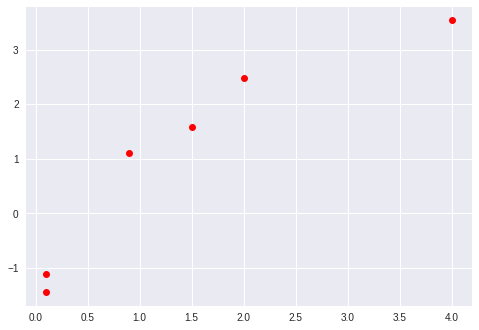

In [3]:
# investigating cocaine use
X_train, X_test, y_train, y_test = TrainingTesting(6)

model = LinearRegression().fit(X_train,y_train)

predictions = model.predict(X_test)
plt.plot(y_test, predictions , 'ro')
plt.show()

# a correlation between predictions and real data means that it is viable

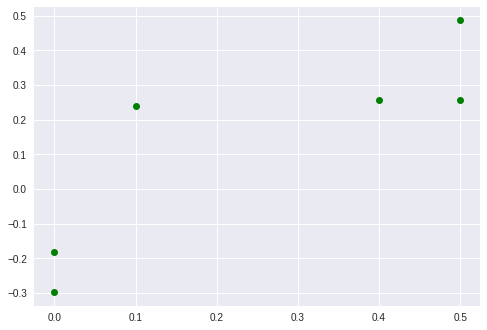

In [4]:
X_train, X_test, y_train, y_test = TrainingTesting(8)

model = LinearRegression().fit(X_train,y_train)

predictions = model.predict(X_test)
plt.plot(y_test, predictions , 'go')
plt.show()

# crack use appears proportional but non-linear
# further modeling might be required to find a proper relationship